# Data Info

The dataset taken here is ‘Red wine Quality’ by UCI Machine Learning. Originally there are two datasets in the benchmark dataset repository, but the ‘red wine’ data is only taken.

Link:https://archive.ics.uci.edu/ml/datasets/Wine+Quality

This data is related to wine data of Portuguese "Vinho Verdo". The classification and regression tasks can be done this data. 

Dataset Details: There are 1599 instances in the dataset and with 12 columns. The final column is the ‘Quality’ which is used as target variable. The goal is to predict the quality of wine based on its chemical properties. 

This data contains quality ratings from 0-10; The values of the column are converted to a binary classification by defining the ratings of 6,7,8,9,10 as positive (i.e., 1) and all other ratings as negative (i.e., 0).

# 1. Load the data

The essential subtasks for this part of the project are: <br>
Load the datasets into numpy objects (i.e., arrays or matrices) in Python. Remember to convert the wine dataset to a binary task, as discussed above.
Clean the data. Are there any missing or malformed features? Are there are other data oddities that need to be dealt with? You should remove any examples with missing or malformed features and note this in your report.
Compute some statistics on the data. E.g., what are the distributions of the positive vs. negative classes, what are the distributions of some of the numerical features? <br>

In [1730]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
from math import sqrt



#classifiaction
from sklearn.svm import LinearSVC,SVC
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#evaluation metrics
from sklearn.metrics import mean_squared_error, accuracy_score,precision_score,recall_score,f1_score, roc_auc_score, roc_curve  # for classification



In [1731]:
# Load the Red Wines dataset
data = pd.read_csv("winequality-red.csv", sep=';')

# Display first few records
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [1612]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [1454]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [1455]:
data.shape

(1599, 12)

'Mean quality of Red Wine is: 5.64'

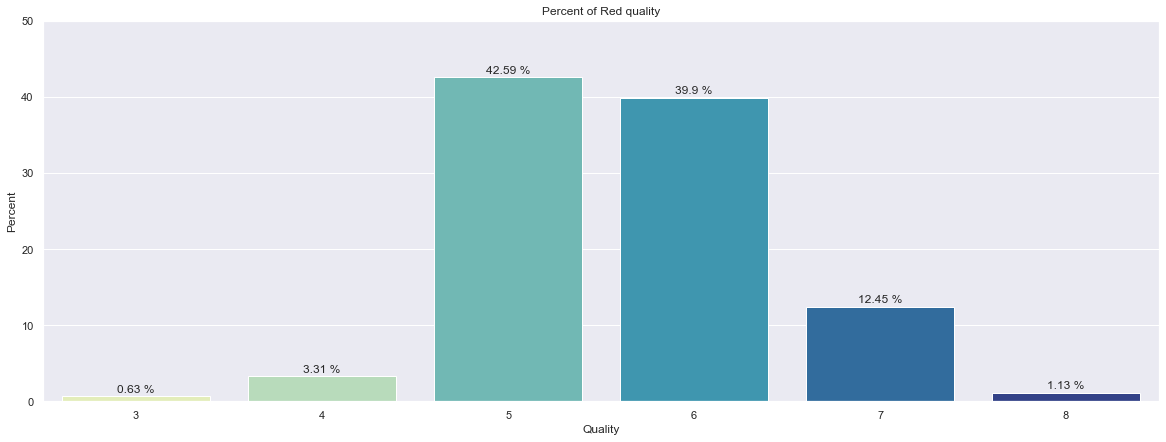

In [1732]:
red_index = data["quality"].value_counts(normalize= True).mul(100).rename("percent").reset_index()


fig,ax = plt.subplots(1,1, figsize= (20, 7))
red = sns.barplot(x= "index", y= "percent", data= red_index, palette= "YlGnBu", ax= ax)
red.set_xlabel("Quality")
red.set_ylabel("Percent")
red.set_title("Percent of Red quality")
red.set_ylim(0,50)

# Write mean quality 
display("Mean quality of Red Wine is: " + str(round(data["quality"].mean(), 2)))


# Write in each bin 
for p in red.patches:
    height = p.get_height().round(2)
    text = str(height) + " %"
    red.text(p.get_x()+p.get_width()/2,height + .5,text,ha="center")


# 2. Remove Outliers

### Method 1: Using Interquartile Range

In [1733]:
data1 =data.copy()
Q1 =data1.quantile(0.25)
Q3= data1.quantile(0.75)
IQR = Q3-Q1
print(IQR)

fixed acidity            2.100000
volatile acidity         0.250000
citric acid              0.330000
residual sugar           0.700000
chlorides                0.020000
free sulfur dioxide     14.000000
total sulfur dioxide    40.000000
density                  0.002235
pH                       0.190000
sulphates                0.180000
alcohol                  1.600000
quality                  1.000000
dtype: float64


In [1734]:
data1 = data1[~((data <(Q1 - 1.5*IQR)) | (data >(Q3 + 1.5*IQR))).any(axis=1)]
print(data1.shape)

(1179, 12)


In [1735]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1599-1179)/1599)*100,'%')

Percentage Data Loss : 26.26641651031895 %


### Method 2: Using Z score Method

In [1736]:
from scipy.stats import zscore
data3 =data.copy()

z_score = zscore(data3)
z_score_abs = np.abs(z_score)
data3= data3[(z_score_abs < 3).all(axis=1)]
data3.shape


(1451, 12)

In [1737]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1599-1451)/1599)*100,'%')

Percentage Data Loss : 9.255784865540964 %


#### We will use z-score method to remove outliers as the data loss of using this method is 9.26% compared to 26.3%.

In [1738]:
data = data3
data.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

#### The data is moderately skewed, so transformation is not necessary.

In [1739]:
data["quality"].unique()

array([5, 6, 7, 4, 8])

# 3. Observe Relationships between Quality and other Chemical Features

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

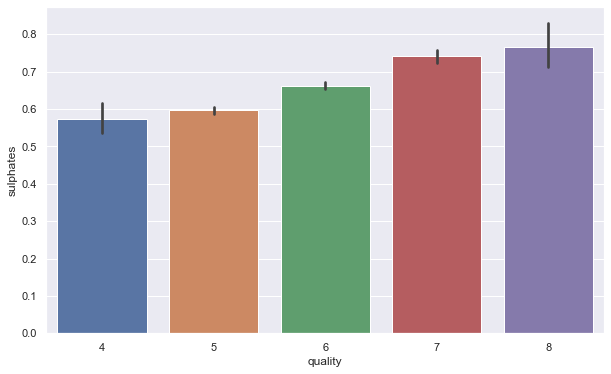

In [1740]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = data)

#### --> Above plot: Sulphates level goes higher with the quality of wine

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

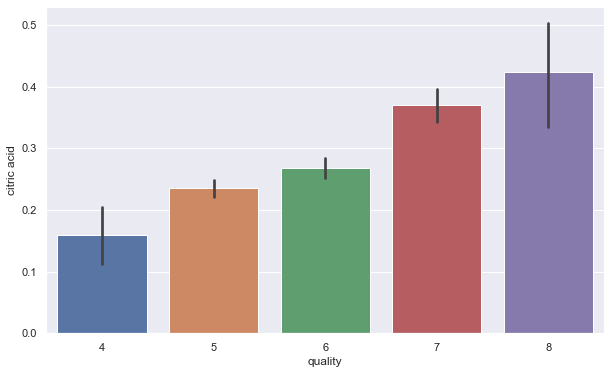

In [1741]:
import seaborn as sns

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = data)

#### --> positive relationship between quality and citric acid


<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

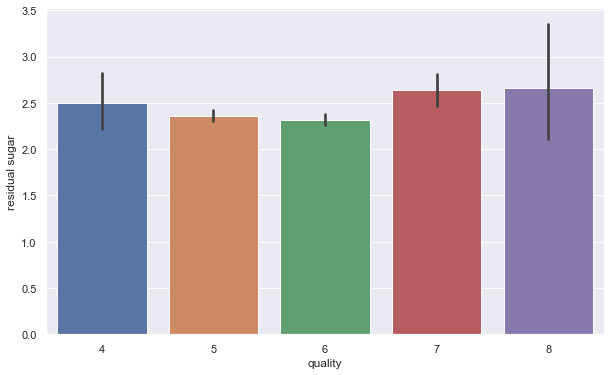

In [1742]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

#### --> no relationship

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

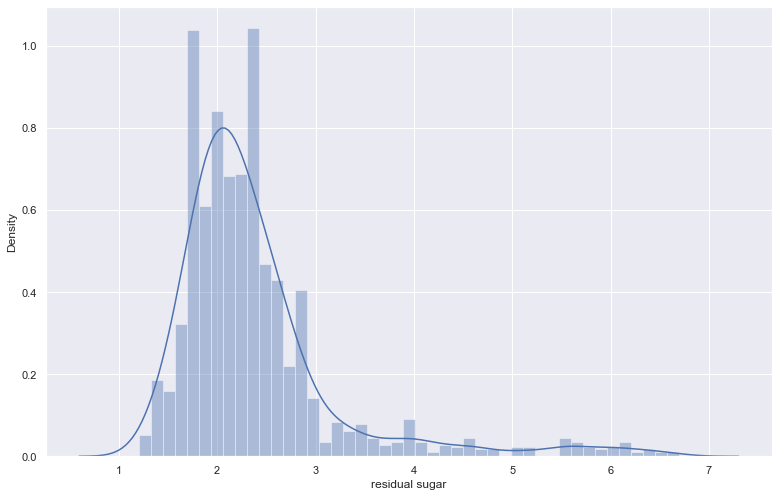

In [1470]:
sns.distplot(data['residual sugar'])

#### --> The histogram is highly left skewed. Good quality wine seem to have less residual sugar.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

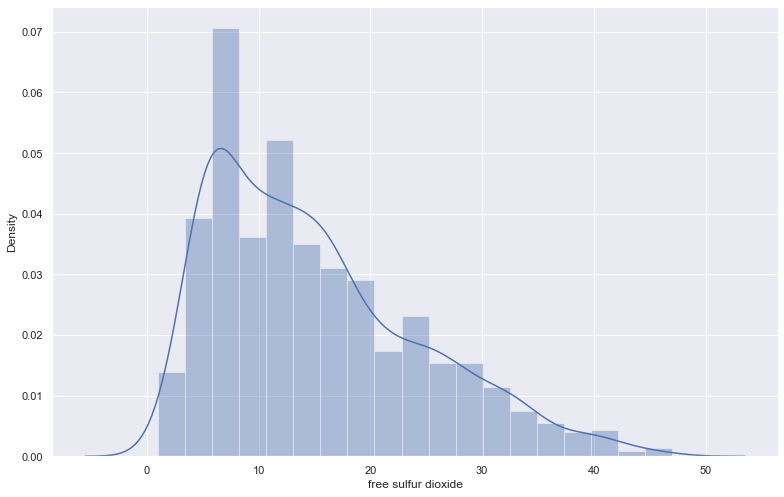

In [1472]:
sns.distplot(data['free sulfur dioxide'])

#### --> Most of the free sulfur dioxide seems to be between the 1-40.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

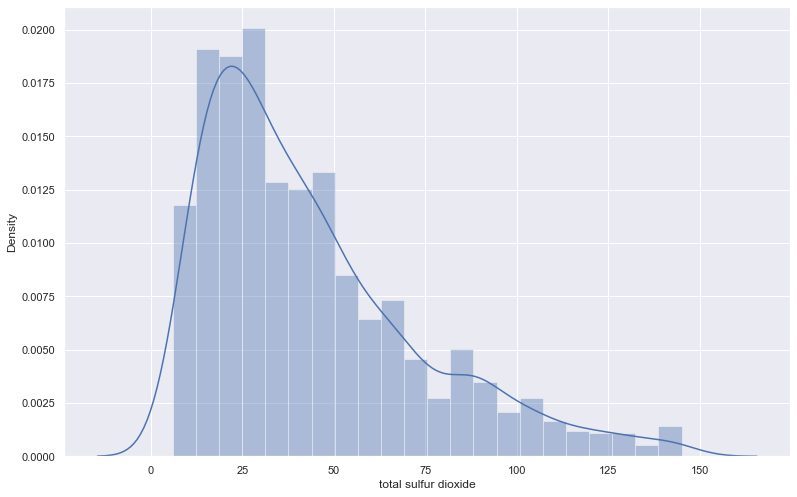

In [1473]:
sns.distplot(data['total sulfur dioxide'])


#### --> Most of the total sulfur dioxide seems to a have a spread between 0 and 150

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

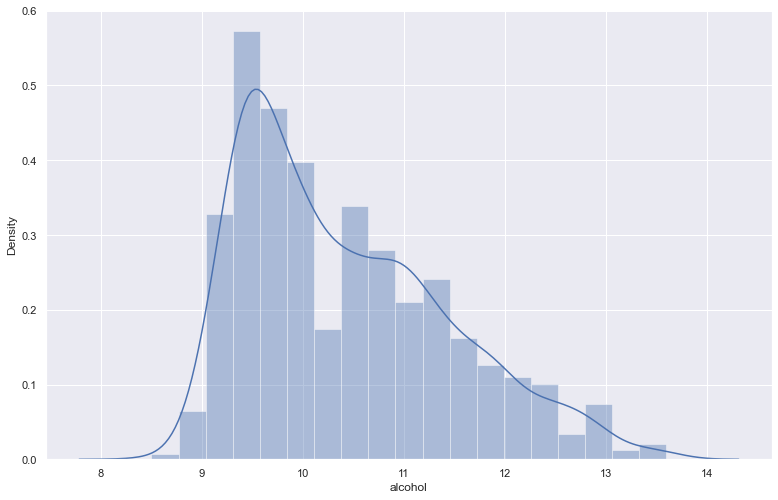

In [1476]:
sns.distplot(data['alcohol'])


#### -> The alcohol content seems to vary from 8 to 14 with most of data around 9-10

### Correlation matrix output shows following behaviour:

#### Fixed Acidity
It shows positive correlation with citric acid which is true since citric acid is one of the fixed acid. It also shows positive correlation with density. It also shows significant negative correlation with pH and volatile acidity.

#### Volatile Acidity
It is highly negatively correlated with citric acid and quality.

#### Free SO2
It shows significant positive correlation with total SO2, and very less correlation with sulphates.

#### Density
Significant negative correlation is observed with alcohol, acidity (fixed and citric acid) and pH.

#### Quality
Quality and alcohol is positively correlated along with negative correlation with volatile acidity.

Also from above scatterplot matrix, residual sugar and pH doesn’t seem to have any kind of effect to quality

In [1655]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


### Correlation between attributes and quality

In [1743]:
# Finding correlation between attributes and quality

correlation=data.corr()
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.501501
sulphates               0.386567
citric acid             0.243999
fixed acidity           0.145163
residual sugar          0.061482
free sulfur dioxide    -0.071202
pH                     -0.082164
chlorides              -0.108787
density                -0.167568
total sulfur dioxide   -0.237745
volatile acidity       -0.353443
Name: quality, dtype: float64

#### alcohol and sulphates have high correlation with quality.

### Example of Positive Correlation ( between fixed acidity and density)

Text(0.5, 0.98, 'Fixed Acidity vs Density')

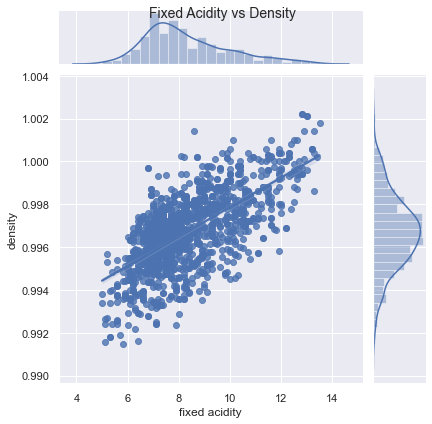

In [1657]:
# correlation between fixed acidity and density

correlation1 = data[['fixed acidity', 'density']]
gridA = sns.JointGrid(x="fixed acidity", y="density", data=correlation1, size=6)
gridA=gridA.plot(sns.regplot, sns.distplot)
gridA.fig.suptitle("Fixed Acidity vs Density",
                  fontsize=14)

### Example of Negative Correlation (between fixed acidity and pH)

Text(0.5, 0.98, 'Fixed Acidity vs pH')

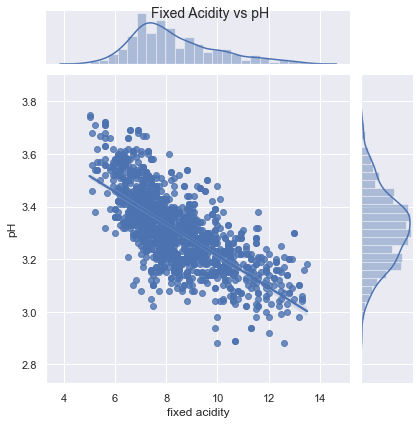

In [1481]:
# correlation between fixed acidity and pH

correlation1 = data[['fixed acidity', 'pH']]
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=correlation1, size=6)
gridA=gridA.plot(sns.regplot, sns.distplot)
gridA.fig.suptitle("Fixed Acidity vs pH",
                  fontsize=14)

### Example of Zero Correlation - between quality and residual sugar

Text(0.5, 0.98, 'Quality vs Residual Sugar')

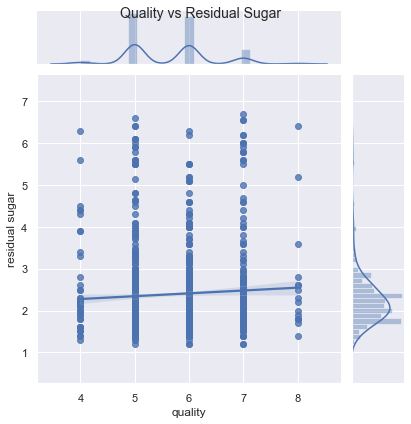

In [1482]:
correlation3 = data[['quality', 'residual sugar']]
gridA = sns.JointGrid(x="quality", y="residual sugar", data=correlation3, size=6)
gridA=gridA.plot(sns.regplot, sns.distplot)
gridA.fig.suptitle("Quality vs Residual Sugar",
                  fontsize=14)

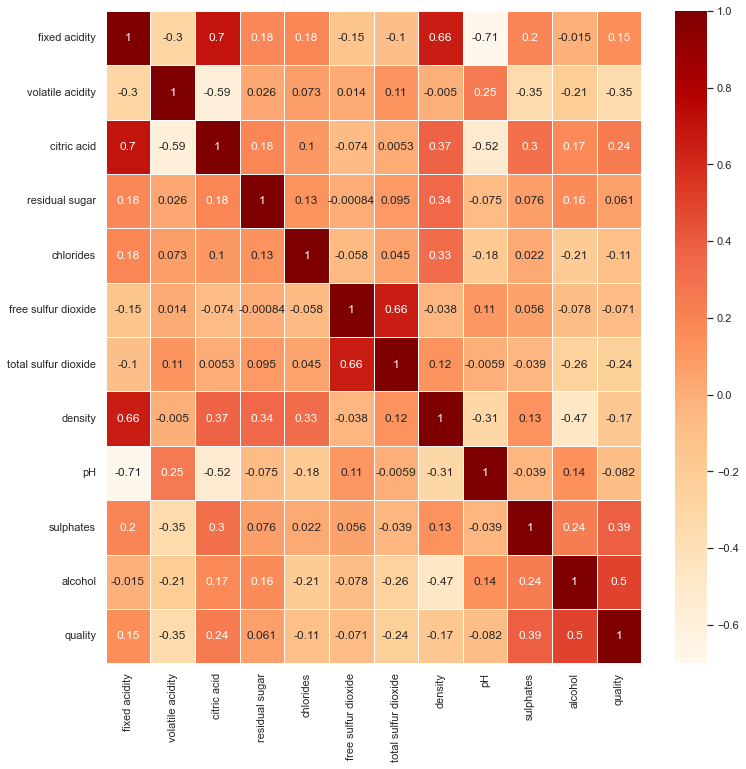

In [1485]:
# Sample correlations using Seaborn heatmap

correlation = data.corr()
plt.figure(figsize=(12, 12)) 
heatmap = sns.heatmap(correlation, annot=True, linewidths=0.5, linecolor="white",vmin=-0.7, cmap="OrRd")

# 4. Converting the response variables as binary response variables (good/bad)

In [1584]:
data.quality.unique()

array([5, 6, 7, 4, 8])

In [1744]:
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',
                                      6: 'good', 7: 'good', 8: 'good'})

In [1745]:
data['quality'].value_counts()

good    787
bad     664
Name: quality, dtype: int64

In [1746]:
data['quality'].shape

(1451,)

In [1747]:
data.isnull().sum() # no missing value

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [1748]:
data.shape #output: (col, row)

(1451, 12)

In [1749]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

data['quality'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1451, dtype: int64>

##  The effect of features on quality of wine
### quality = 1 denotes good quality, and quality = 0 denotes low quality.

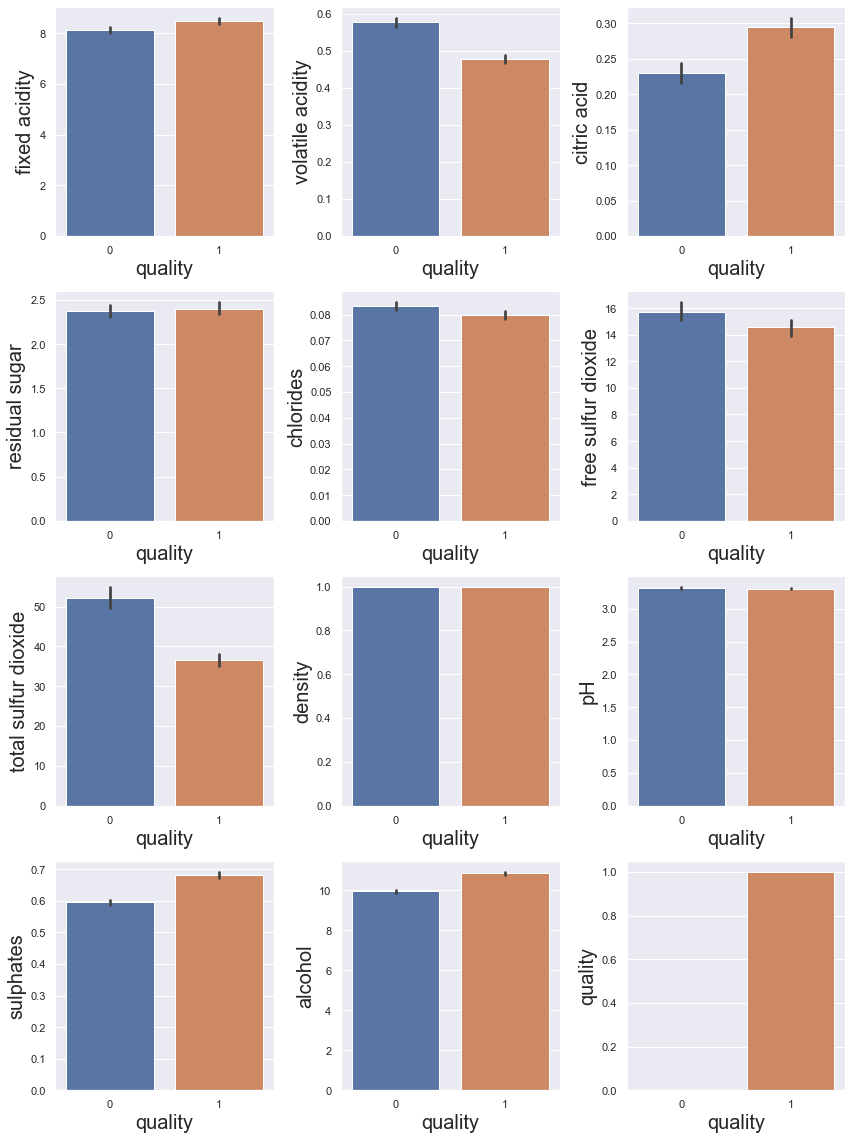

In [1750]:
plt.figure(figsize=(12,16), facecolor='white')
plotnumber =1
for column in data:
    if plotnumber <=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.barplot(data['quality'],data[column]) 
        plt.xlabel('quality',fontsize=20)
        plt.ylabel(column, fontsize =20)
    plotnumber+=1
plt.tight_layout()
plt.show()

#### 1. Quality of wine increase with increase in alcohol, sulpates, citric acid, and fixed acidity.
#### 2. Quality of wine decreses with increase in total sulfur dioxide,chlorides, volatile acidity, chlorides, and free sulfur dioxide.
#### 3. Density, and PH are not deciding factor in determining quality of wine.
#### 4. Good quality (6,7,8) of wine posses higher amount of alcohol.
#### 5. Good quality of wine posses lower amount of total sulfur dioxide and volatile acidity.


# 5. Most Important Features

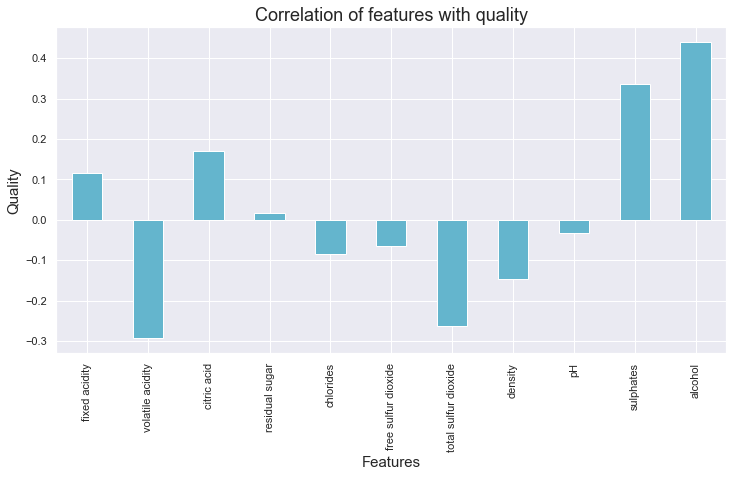

In [1751]:
plt.figure(figsize = (12,6))
data.corr()['quality'].drop(['quality']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Quality',fontsize=15)
plt.title('Correlation of features with quality',fontsize = 18)
plt.show()

#### --> Alcohol and sulphates have high correlation with the quality of wine.

### Checking Multicollinearity between features using variance_inflation_factor

In [1752]:
vif=pd.DataFrame()
vif['vif'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
vif['Features']= data.columns
vif

,vif,Features
0,89.206281,fixed acidity
1,19.941064,volatile acidity
2,9.399641,citric acid
3,9.937351,residual sugar
4,18.125602,chlorides
5,7.050896,free sulfur dioxide
6,7.144364,total sulfur dioxide
7,1701.470628,density
8,1243.822542,pH
9,33.246001,sulphates


#### --> VIF values greater than 1000 indicate severe multicollinearity. Looking at the multicollinearity, pH and density are not contributing to label. I will drop these two features.

In [1753]:
data= data.drop(['density', 'pH'], axis=1)

# 6. Modelling

In [1754]:
# dividing the dataset into dependent and independent variables

X = data.iloc[:,:9]
y = data.iloc[:,9]

# determining the shape of x and y.
print(X.shape)
print(y.shape)


(1451, 9)
(1451,)


### Check the shape of our train and test sets.

In [1755]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (1160, 9)
Training target vector size: (1160,)
Test feature matrix size: (291, 9)
Test target vector size: (291,)


## Split the data into train and test sets and scale them using Standard Scaler

In [1756]:
sc = StandardScaler()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)
X_train_scaled.shape

(1160, 9)

## Find Optimal value of n_neighbors for KNN 

Minimum error:- 0.28865979381443296 at K = 8


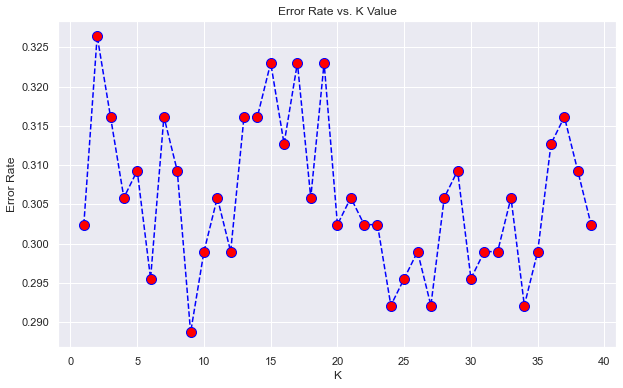

In [1757]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_scaled,y_train)
 pred_i = knn.predict(X_test_scaled)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

From the plot, the smallest error we got is 0.2886 at K=8. Further on, we visualize the plot between accuracy and K value.

Maximum accuracy:- 0.711340206185567 at K = 8


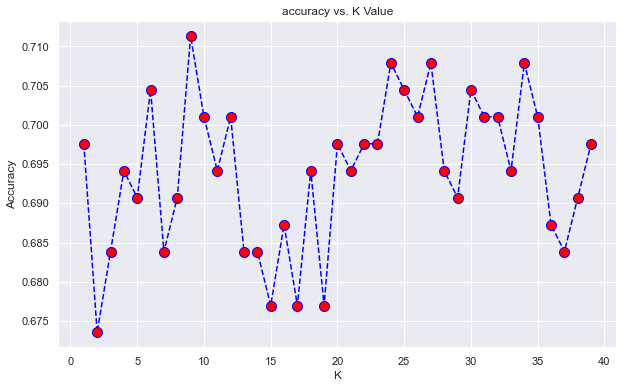

In [1758]:
acc = []

from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train_scaled,y_train)
    yhat = neigh.predict(X_test_scaled)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

#### We got the accuracy of 0.712 at K=8. As we already derived the error plot and got the minimum error at K=8, so we will get better efficiency at that K value.

### Find the best random state and use that to calcuate accuracy scores for each model.

In [1759]:

model=[ LogisticRegression(), KNeighborsClassifier(n_neighbors = 8),RandomForestClassifier(), LinearSVC(),
        DecisionTreeClassifier(),GradientBoostingClassifier(), GaussianNB(), MLPClassifier() ]

maxAccu=0
maxRS=0

for m in model:
    maxAccu=0
    maxRS=0
    for i in range(1,250):
        sc = StandardScaler()
        X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=i)
        X_train_scaled = sc.fit_transform(X_train)
        X_test_scaled = sc.fit_transform(X_test)
        
        m.fit(X_train_scaled,y_train)
        y_pred=m.predict(X_test_scaled)
        acc=accuracy_score(y_test,y_pred)
        if acc>maxAccu:
            maxAccu=acc
            maxRS=i
    print('Best accuracy is', maxAccu ,'on Random_state', maxRS)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Best accuracy is 0.8075601374570447 on Random_state 26
Classification ML Algorithm Evaluation Matrix LogisticRegression() is


Accuracy Score :
 0.7697594501718213


Best accuracy is 0.7903780068728522 on Random_state 110
Classification ML Algorithm Evaluation Matrix KNeighborsClassifier(n_neighbors=8) is


Accuracy Score :
 0.738831615120275


Best accuracy is 0.852233676975945 on Random_state 3
Classification ML Algorithm Evaluation Matrix RandomForestClassifier() is


Accuracy Score :
 0.7835051546391752


Best accuracy is 0.8075601374570447 on Random_state 49
Classification ML Algorithm Evaluation Matrix LinearSVC() is


Accuracy Score :
 0.7628865979381443


Best accuracy is 0.7938144329896907 on Random_state 101
Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 0.718213058419244


Best accuracy is 0.8144329896907216 on Random_state 134
Classification ML Algorithm Evaluation Matrix GradientBoostingClassifier() is


Accuracy Score :
 0.75

#### We can see that Random Forest Classifier gives maximum Accuracy so we will continue further investigation with cross validation of this model.

## Cross Validation

In [1760]:
scores = []

for m in models:
    score = cross_val_score(m, X_train_scaled, y_train, cv =10)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    scores.append(score.mean())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.78448276 0.68965517 0.81034483 0.76724138 0.69827586 0.77586207
 0.67241379 0.70689655 0.71551724 0.73275862]
Mean Score : 0.7353448275862069
Std deviation : 0.043965517241379294




Cross Validation Score KNeighborsClassifier(n_neighbors=9) :

Score : [0.77586207 0.6637931  0.70689655 0.76724138 0.69827586 0.74137931
 0.67241379 0.6637931  0.73275862 0.6637931 ]
Mean Score : 0.7086206896551724
Std deviation : 0.04130740879555495




Cross Validation Score RandomForestClassifier() :

Score : [0.81034483 0.79310345 0.8362069  0.84482759 0.75       0.8362069
 0.75862069 0.74137931 0.78448276 0.86206897]
Mean Score : 0.8017241379310345
Std deviation : 0.04061799651513704




Cross Validation Score LinearSVC() :

Score : [0.79310345 0.69827586 0.81034483 0.76724138 0.69827586 0.77586207
 0.67241379 0.70689655 0.71551724 0.73275862]
Mean Score : 0.7370689655172413
Std deviation : 0.04416789123258447




Cross Validation Score Decis

#### The CV Mean Score result again confirms our claim that Random Forest Classifier is the best model for the red wine classification.

In [1720]:
df_scores = pd.DataFrame(scores, columns = ['CV_Mean_Score'])
df_scores = pd.DataFrame(scores, index =['Logistic Regression', 'KNeighbors', 'Random Forest', 'SVM', 'Decision Tree', 'Gradient Boosting', 'GaussianNB', 'MLP'],
                                              columns =['CV_Mean_Score'])
df_scores = df_scores.rename_axis('Machine Learning Models')
df_scores = df_scores.sort_values('CV_Mean_Score', ascending = False)


<AxesSubplot:xlabel='Machine Learning Models', ylabel='CV_Mean_Score'>

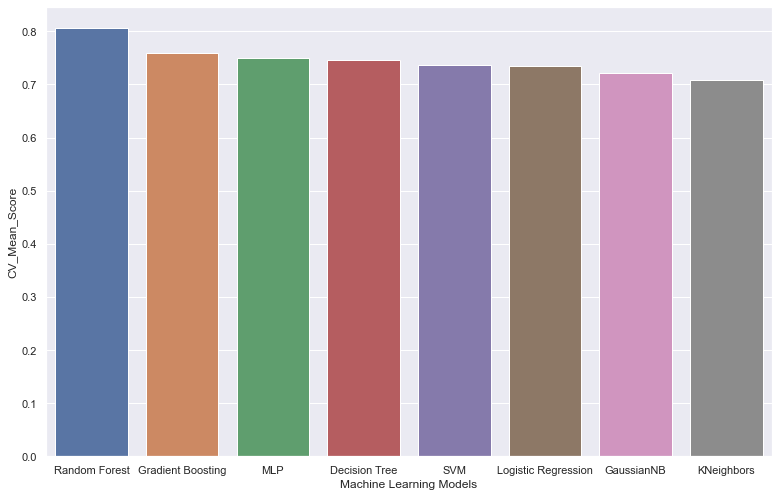

In [1762]:

sns.set(rc={'figure.figsize':(13,8.27)})
sns.barplot(x = df_scores['CV_Mean_Score'].index, y='CV_Mean_Score',data= df_scores)


In [1763]:
df_scores.index.tolist()

['Random Forest',
 'Gradient Boosting',
 'MLP',
 'Decision Tree',
 'SVM',
 'Logistic Regression',
 'GaussianNB',
 'KNeighbors']

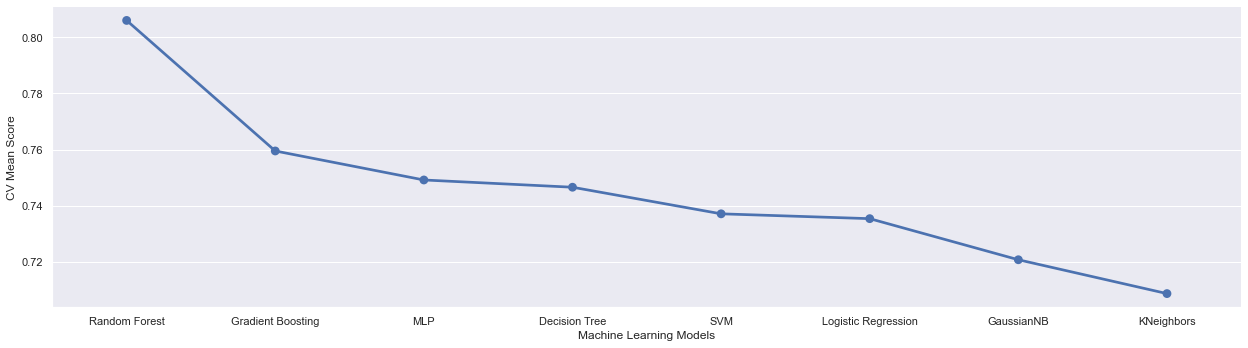

In [1764]:
sns.set(rc={'figure.figsize':(13,8.27)})
plot = sns.factorplot(x = df_scores.index.tolist(), y='CV_Mean_Score', data= df_scores ,kind='point',size=5,aspect=3.5)

plot.set( xlabel = "Machine Learning Models", ylabel = "CV Mean Score")

### In my prediction model, Random Forest Classifier gave the highest accuracy of 79% , followed by Multi Layer Perceptron and Gradient Boosting Classifier. 

# Hyper Parameter Tuning : GridSearchCV

### Let's find a set of hyperparameters that best fit your data according to the scoring metric that you want your model to optimize on.

In [1765]:
parameter = {'n_estimators':[30,50,60],'max_depth': [10,20,40,60,80],
             'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [1766]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1)
GCV.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 40, 60, 80],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [30, 50, 60]})

In [1767]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'max_features': 'auto',
 'n_estimators': 50}

# Final Model 

In [1768]:
Final_model = RandomForestClassifier(criterion='entropy',n_estimators= 50, max_depth=20 ,max_features='auto')
Final_model.fit(X_train_scaled, y_train)
y_pred=Final_model.predict(X_test_scaled)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(y_test, y_pred))

Accuracy Score :
 0.8144329896907216


## The ROC AUC Score

The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

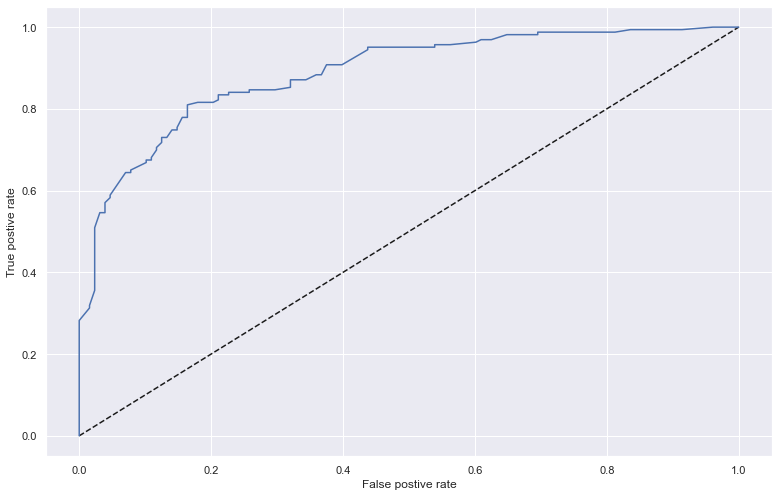

Auc Score :
 0.8117091641104295


In [1769]:
y_pred_prob = Final_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(y_test, Final_model.predict(X_test_scaled))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

### We can say that our model has good discriminatory ability; 81% of the time, the our model will correctly assign  distinguish between good quality and poor quality red wine.

### Lastly, Save the model!


In [1292]:

import joblib
joblib.dump(Final_model,'Red_Wine_Quality_Final.pkl')

['Red_Wine_Quality_Final.pkl']